# Exploring Table Data: 2014-15 NBA Shot Log

Erik Gabrielsen, Danh Nguyen

## Business Understanding

Using the shot log data set from the 2014-15 NBA season, we can examine the shooting and defending trends of the NBA as a whole. We can break the dataset into individual players, and determine whether or not defender distance has an impact on another's shooting. In sports, home-field advantage can have an impact on the result of the game. Although we cannot quantify what creates home-field advantage in this dataset, we can attempt to determine if players' performances are better at home. 


## Data Understanding

The raw data set for the 2014-15 NBA Season is displayed below. 

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('~/Downloads/shot_logs.csv') # read in the csv file

df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [2]:
df.describe()

/Users/danh/anaconda/envs/machinelearning/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,NaN,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,NaN,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,NaN,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


### Data Cleaning and Transformation 

From the full dataset we extracted a subset of the attributes; a summary of their transformation and representation is displayed below. Descriptions of transforming nominal variables and discretizing ratio attributes are detailed in the following sections.  


**Attribute**|**Attribute Type**|**Representation**|**Meaning**
:-----:|:-----:|:-----:|:-----:
GAME\_ID|Nominal|Integer| Unique ID for a game
LOCATION|Nominal|Binary|0: home, 1: away
W|Nominal|Binary|0: loss, 1: win
SHOT\_NUMBER|Nominal|Integer|Player's shot per game
PERIOD|Ordinal|Integer|Period during a game
GAME\_CLOCK|Ratio|Date-Time|Minutes and seconds left in game
SHOT\_CLOCK (original)|Ratio|Float|Seconds left in game
SHOT\_CLOCK (transformed)|Nominal|Integer|24-17 s, 16-9 s, 8-0 s
DRIBBLES|Ordinal|Integer|Number of dribbles taken before shot
TOUCH\_TIME|Ratio|Float|Seconds player possessed the ball before taking the shot
SHOT\_DIST|Ratio|Float|Distance from basket where shot was taken
SHOT\_RANGE|Nominal|Integer|0-15 ft, 15-24 ft, 24+ ft
PTS\_TYPE|Ordinal|Integer|Number of points scored if made
SHOT\_RESULT|Nominal|Binary|0 for missed basket, 1 for made basket
CLOSE\_DEF\_DIST|Ratio|Float|Distance closest defender was from player

In [3]:
print(df.dtypes)
df.count()

GAME_ID                         int64
MATCHUP                        object
LOCATION                       object
W                              object
FINAL_MARGIN                    int64
SHOT_NUMBER                     int64
PERIOD                          int64
GAME_CLOCK                     object
SHOT_CLOCK                    float64
DRIBBLES                        int64
TOUCH_TIME                    float64
SHOT_DIST                     float64
PTS_TYPE                        int64
SHOT_RESULT                    object
CLOSEST_DEFENDER               object
CLOSEST_DEFENDER_PLAYER_ID      int64
CLOSE_DEF_DIST                float64
FGM                             int64
PTS                             int64
player_name                    object
player_id                       int64
dtype: object


GAME_ID                       128069
MATCHUP                       128069
LOCATION                      128069
W                             128069
FINAL_MARGIN                  128069
SHOT_NUMBER                   128069
PERIOD                        128069
GAME_CLOCK                    128069
SHOT_CLOCK                    122502
DRIBBLES                      128069
TOUCH_TIME                    128069
SHOT_DIST                     128069
PTS_TYPE                      128069
SHOT_RESULT                   128069
CLOSEST_DEFENDER              128069
CLOSEST_DEFENDER_PLAYER_ID    128069
CLOSE_DEF_DIST                128069
FGM                           128069
PTS                           128069
player_name                   128069
player_id                     128069
dtype: int64

### Missing Values 

The only attribute with missing values are "shot clock time," since the shot clock does not turn on when the game clock is below 24 seconds. In these scenario, we use the game clock time for the shot clock time. We do this by converting game clock `strings` into `datetime` objects and copying the seconds value in for the shot clock time.


In [25]:
# replace shot clock with game_clock
df_imputed = df.copy()
# extract game clock seconds
df_imputed["CLOCK_SECONDS"] = pd.to_datetime(df_imputed["GAME_CLOCK"], format='%M:%S').dt.second
# convert game clock to time
df_imputed["GAME_CLOCK"] = pd.to_datetime(df_imputed["GAME_CLOCK"], format='%M:%S').dt.time
df_imputed["SHOT_CLOCK"] = df_imputed["SHOT_CLOCK"].fillna(value=df_imputed["CLOCK_SECONDS"])
df_imputed["SHOT_CLOCK"] = pd.to_numeric(df_imputed["SHOT_CLOCK"])

# print(df_imputed.SHOT_CLOCK)
# df_imputed["GAME_CLOCK"].describe()

### Discretizing Attributes

Shot distance is discretized into three zones, called "SHOT_RANGE." Shot clock time is also discretized into 3 ranges: 0 to 15 feet (the free throw line), 15 to 24 feet (approximately where the 3 point line is), and 24 feet onwards. Closest defender distance is also broken into 3 intervals, 0-3 feet for highly contested shots, 3-8 feet for contested shots, and 8+ feet for uncontested shots. 

In [68]:
# break up shot clock times
df_imputed2 = df_imputed.copy()
df_imputed2['SHOT_CLOCK'] = pd.cut(df_imputed2.SHOT_CLOCK,[0,8,16,24],3,labels=['0-8 sec','9-16 sec','17-24 sec']) # this creates a new variable

# break up shot distances
df_imputed2['SHOT_RANGE'] = pd.cut(df_imputed2.SHOT_DIST,[0,15,24,100],3,labels=['0-15 ft','15-24 ft','24-100 ft']) # this creates a new variable

# break up defender distance 
df_defender = df_imputed2.copy()
df_defender['CLOSE_DEF_DIST'] = pd.cut(df_imputed2.CLOSE_DEF_DIST,[0,3,8,100],3,labels=['Highly Contested','Contested','Wide Open']) # this creates a new variable

### Transforming Attributes 

The nominal attributes for win-loss, game location, and shot results are transformed into binary values. A "WIN" value of 'W' is mapped to '1', and 'L' is mapped to '0'. Location is mapped from 'H' to '0' for home game, and "A" to '1' for away game. A shot being made is represented as '0' for a "missed" shot and '1' for a "made" shot. 

In [69]:
# drop null values 
df_imputed2.dropna(inplace=True)


# make SHOT_RESULT binary
shotresult = {"made":1 ,"missed" :0}
df_imputed2["SHOT_RESULT"] = df_imputed2["SHOT_RESULT"].apply(shotresult.get).astype(int)

# make WIN binary
winresult = {"W":1 ,"L" :0}
df_imputed2["W"] = df_imputed2["W"].apply(winresult.get).astype(int)

# make LOCATION binary
location = {"A":1 ,"H" :0}
df_imputed2["LOCATION"] = df_imputed2["LOCATION"].apply(location.get).astype(int)

# separate datasets for shot type

two_points = df_imputed2[df_imputed2.PTS_TYPE == 2]
three_points = df_imputed2[df_imputed2.PTS_TYPE == 3]
two_misses = two_points[two_points.SHOT_RESULT == 0]
two_points = two_points[two_points.SHOT_RESULT == 1]
three_misses = three_points[three_points.SHOT_RESULT == 0]
three_points = three_points[three_points.SHOT_RESULT == 1]

print(df_imputed2.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 126276 entries, 0 to 128068
Data columns (total 23 columns):
GAME_ID                       126276 non-null int64
MATCHUP                       126276 non-null object
LOCATION                      126276 non-null int64
W                             126276 non-null int64
FINAL_MARGIN                  126276 non-null int64
SHOT_NUMBER                   126276 non-null int64
PERIOD                        126276 non-null int64
GAME_CLOCK                    126276 non-null object
SHOT_CLOCK                    126276 non-null category
DRIBBLES                      126276 non-null int64
TOUCH_TIME                    126276 non-null float64
SHOT_DIST                     126276 non-null float64
PTS_TYPE                      126276 non-null int64
SHOT_RESULT                   126276 non-null int64
CLOSEST_DEFENDER              126276 non-null object
CLOSEST_DEFENDER_PLAYER_ID    126276 non-null int64
CLOSE_DEF_DIST                126276 non-null f

## Data Visualization 



In [28]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

### Type of Shot Taken

This first graph represents something well known that we wanted to confirm. There are way more 2-pointers taken in the game than 3-pointers.

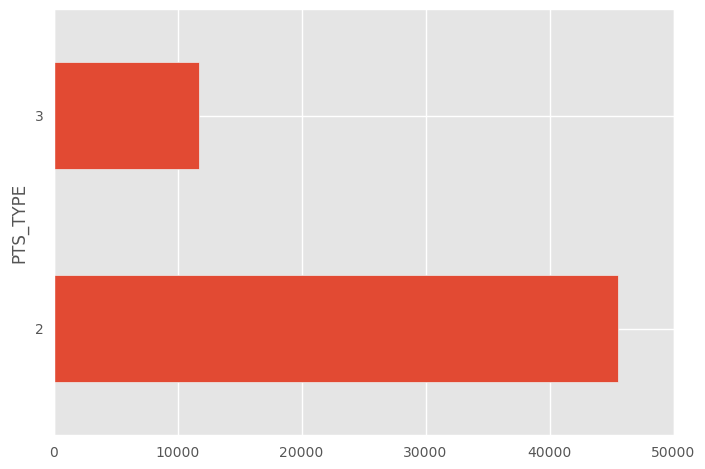

In [86]:
df_grouped = df_imputed2.groupby(by=['PTS_TYPE'])
shooting_percentage = df_grouped.SHOT_RESULT.sum()
ax = shooting_percentage.plot(kind='barh')

### Shots per Shot Clock Period

As expected, most shots are taken 2-pointers, and most shots are taken with 9-16 seconds remaining on the shot clock. If we had data on past seasons, we can see whether or not the game has sped up -- perhaps most shots were taken with only a few seconds remaining in the shot clock years ago.

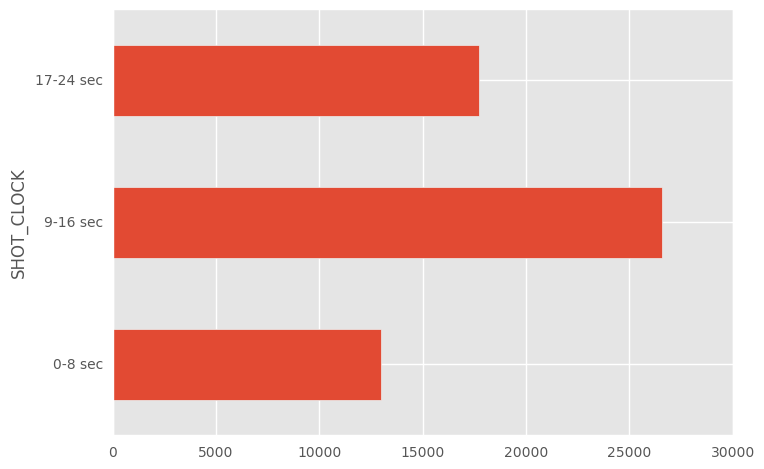

In [85]:
df_grouped = df_imputed2.groupby(by=['SHOT_CLOCK'])
shooting_percentage = df_grouped.SHOT_RESULT.sum()
ax = shooting_percentage.plot(kind='barh')

We further broke down number of shots that were taken per shot clock period into type as well. Both types of shots are taken more during the middle period of the shot clock, and less during the last few seconds of the shot clock.

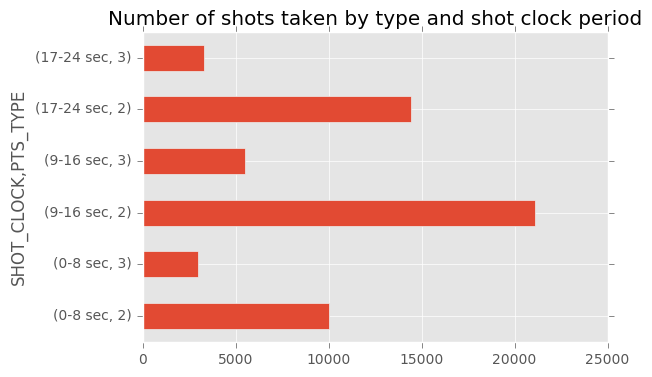

In [30]:
plt.style.use('ggplot')

df_grouped = df_imputed2.groupby(by=['SHOT_CLOCK','PTS_TYPE'])
shooting_percentage = df_grouped.SHOT_RESULT.sum()
ax = shooting_percentage.plot(kind='barh')

plt.title('Number of shots taken by type and shot clock period')

### Shooting Percentage per Shot Clock Period

We examined the shooting percentage of 2- and 3-pointers that were taken per shot clock period. Shots with the highest percentage made were taken in the first few seconds of the shot clock.

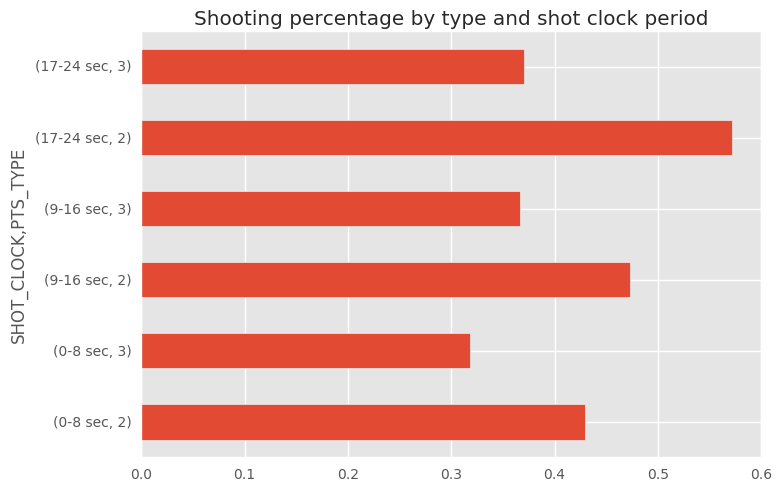

In [66]:
plt.style.use('ggplot') #percentage 

df_grouped = df_imputed2.groupby(by=['SHOT_CLOCK','PTS_TYPE'])
shooting_percentage = df_grouped.SHOT_RESULT.sum() / df_grouped.SHOT_RESULT.count()
ax = shooting_percentage.plot(kind='barh')

plt.title('Shooting percentage by type and shot clock period')

### Contested Shots

We cannot analyze basketball without accounting for defense. The first graph represents the number of contested shots in the season.

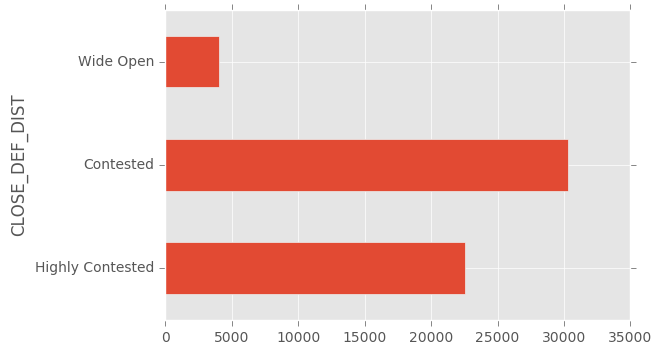

In [40]:
df_defender = df_imputed2.copy()
df_defender['CLOSE_DEF_DIST'] = pd.cut(df_imputed2.CLOSE_DEF_DIST,[0,3,8,100],3,labels=['Highly Contested','Contested','Wide Open']) # this creates a new variable

df_grouped = df_defender.groupby(by=['CLOSE_DEF_DIST'])
shooting_percentage = df_grouped.SHOT_RESULT.sum()
ax = shooting_percentage.plot(kind='barh')

### Defender Distance per Shot Clock Period

While most shots are taken in the middle period of the shot clock, fast plays have a higher percentage. This may be due purely to more shots being taken in the middle period, therefore a higher number of misses, but we wanted to see how defenders react to the shot clock as well. 3-pointers are not as contested as 2-pointers, and as the shot clock winds down, there are less opportunities for wide open shots. 

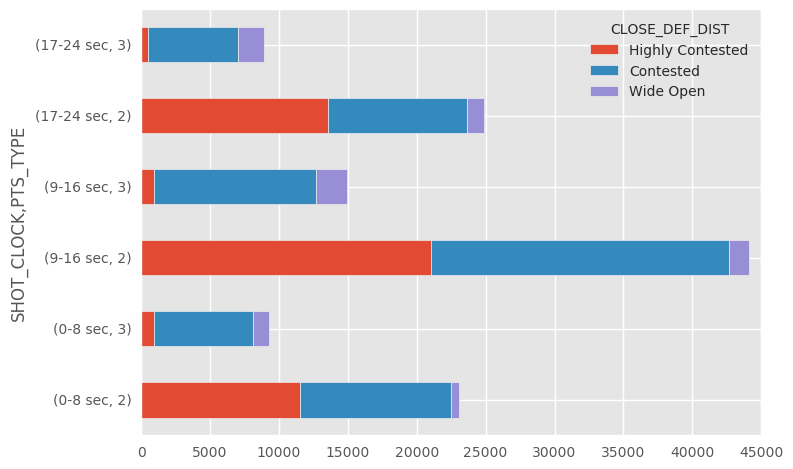

In [84]:
df_defender = df_imputed2.copy()
df_defender['CLOSE_DEF_DIST'] = pd.cut(df_imputed2.CLOSE_DEF_DIST,[0,3,8,100],3,labels=['Highly Contested','Contested','Wide Open']) # this creates a new variable


contestedShotsvsShotClock = pd.crosstab([df_defender['SHOT_CLOCK'], df_defender['PTS_TYPE']], 
                                        df_defender.CLOSE_DEF_DIST)
# print(contestedShotsvsShotClock)

contestedShotsvsShotClock.plot(kind='barh', stacked=True)

### Shot Range

In general, this graph just reaffirms that most shots taken are 2-pointers, and they have a higher percentage of being made.

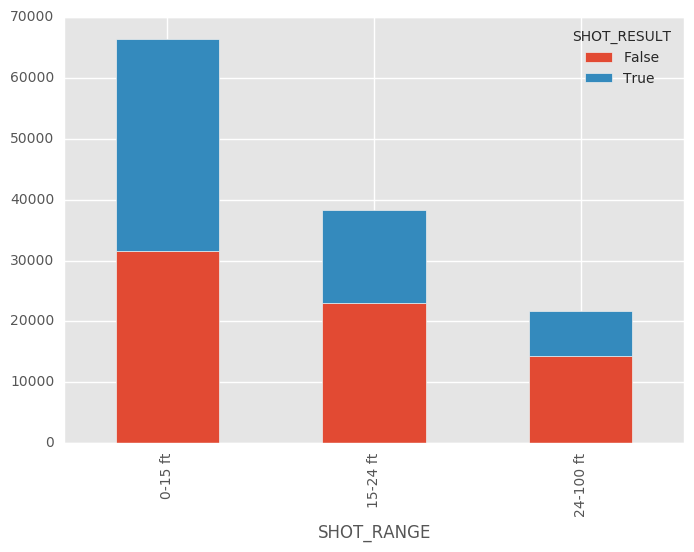

In [76]:
shots_by_dist = pd.crosstab([df_imputed2['SHOT_RANGE']], 
                       df_imputed2.SHOT_RESULT.astype(bool))
shots_by_dist.plot(kind='bar', stacked=True)

### Shots per Quarter

More shots are taken in the first quarter, and the least shots in the fourth; however, the number of 3-pointers appear consistent throughout the game. Players may be more fresh and willing to score in the first quarter, and face more pressure in the fourth, causing a minor drop in shooting performance.

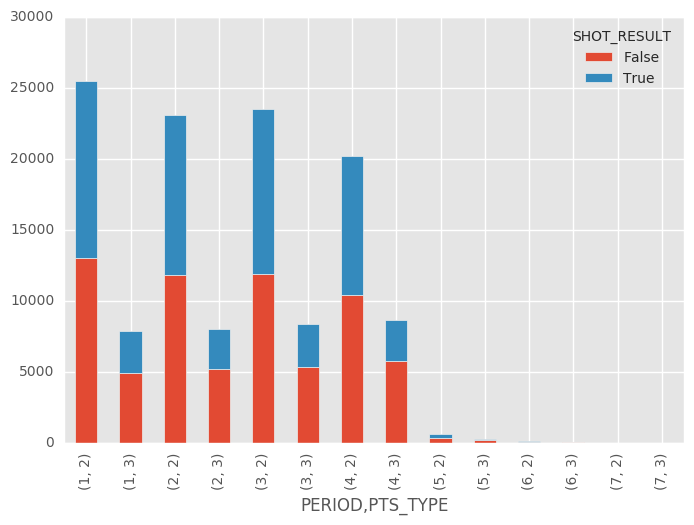

In [87]:
quarterShots = pd.crosstab([df_imputed2['PERIOD'], df_imputed2['PTS_TYPE']], 
                       df_imputed2.SHOT_RESULT.astype(bool))
# print(quarterShots)

quarterShots.plot(kind='bar', stacked=True)

### Shots per Dribble

Most shots are taken without a dribble. Catch-and-shoots from an assist therefore account for more of the game shots than off the dribble. 

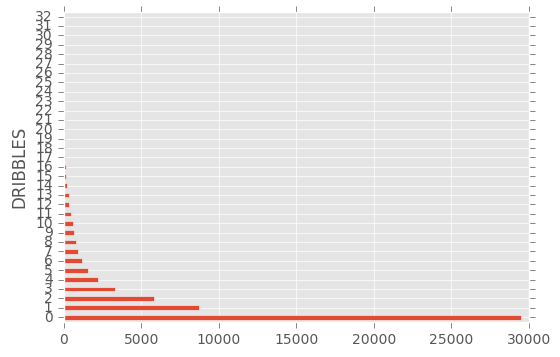

In [35]:
df_grouped = df_imputed2.groupby(by=['DRIBBLES'])
shooting_percentage = df_grouped.SHOT_RESULT.sum()
ax = shooting_percentage.plot(kind='barh')


In [41]:
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

In [42]:
for col in ['GAME_ID','MATCHUP','SHOT_NUMBER','CLOSEST_DEFENDER','CLOSEST_DEFENDER_PLAYER_ID','PTS', 'CLOCK_SECONDS']:
    if col in df_imputed2:
        del df_imputed2[col]

In [ ]:
ax = scatter_matrix(df_imputed2,figsize=(15, 20))

### Correlation Matrix
There is not much correlation between attributes in the data. The ones with high correlation are common sense -- more dribbles correlates to a longer touch time, and shot distance correlates directly to what type of point the shot is. 

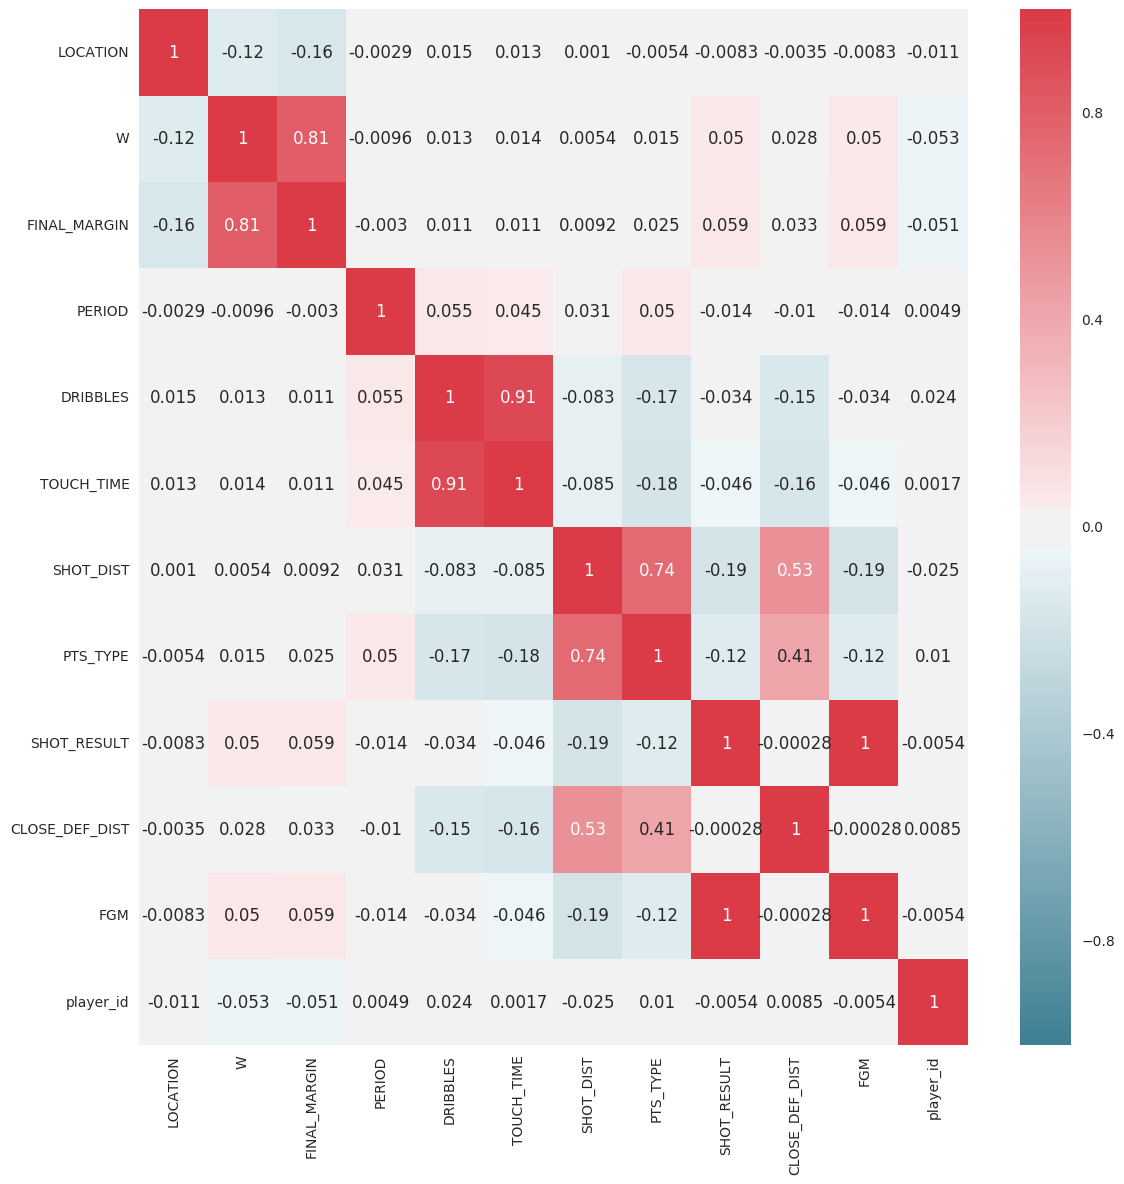

In [43]:
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(df_imputed2.corr(), cmap=cmap, annot=True)

f.tight_layout()

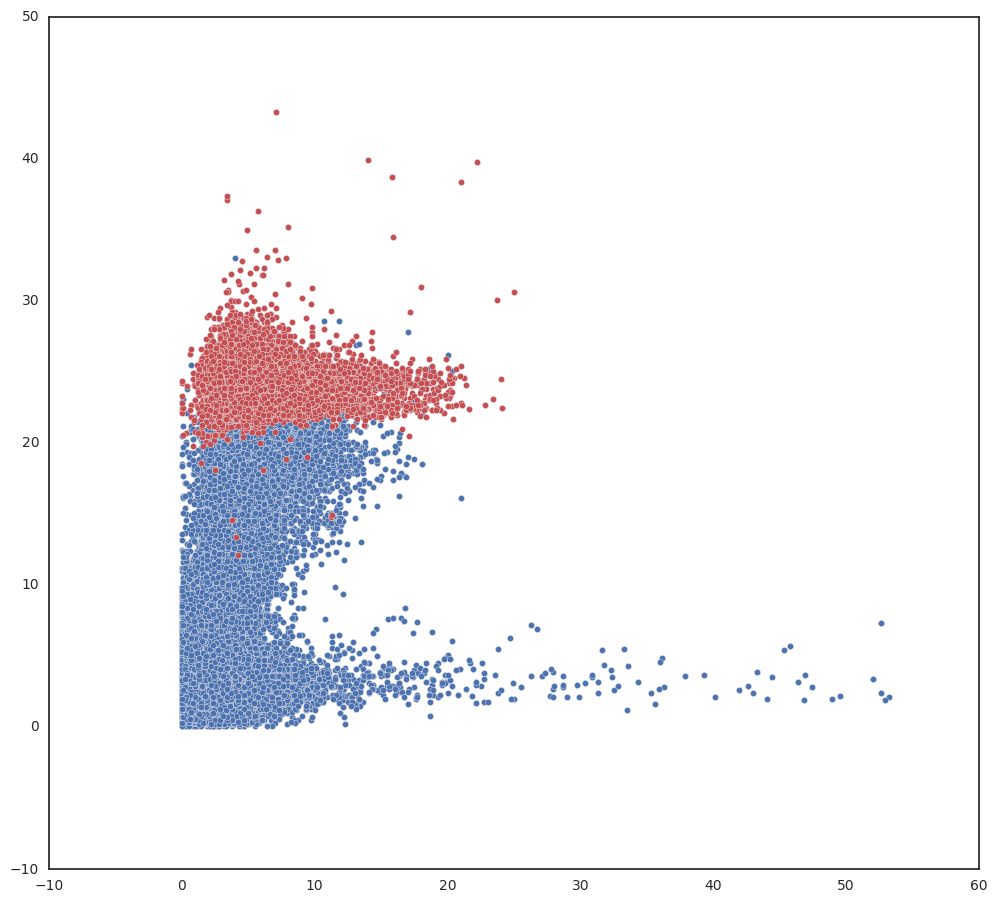

In [44]:
import matplotlib.pyplot as plt

sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(two_points.CLOSE_DEF_DIST, two_points.SHOT_DIST)
plt.scatter(three_points.CLOSE_DEF_DIST, three_points.SHOT_DIST, c='r')
plt.show()

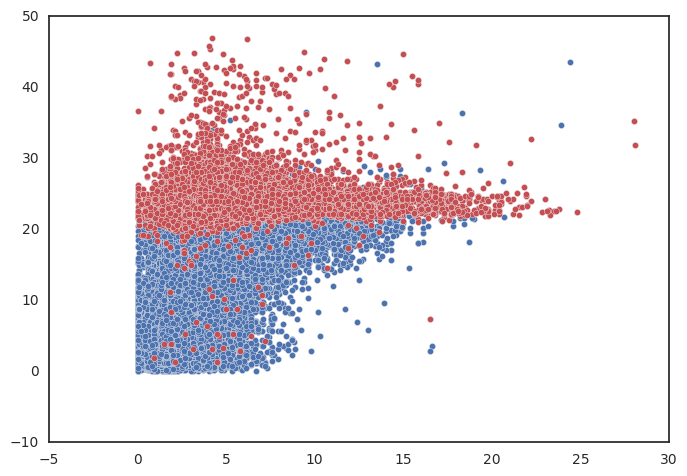

In [45]:


plt.scatter(two_misses.CLOSE_DEF_DIST, two_misses.SHOT_DIST)
plt.scatter(three_misses.CLOSE_DEF_DIST, three_misses.SHOT_DIST, c='r')
plt.show()

### Shot Distance per Shot Clock Period

We graphed plots of shot distance to see how shot distance distributions vary with the shot clock. All of the distributions are bimodal around near the basket and around the three point distance. Shots taken early in the period is less spread out than as the clock winds down. There is not much difference in spread of whether the shot was made or not. 

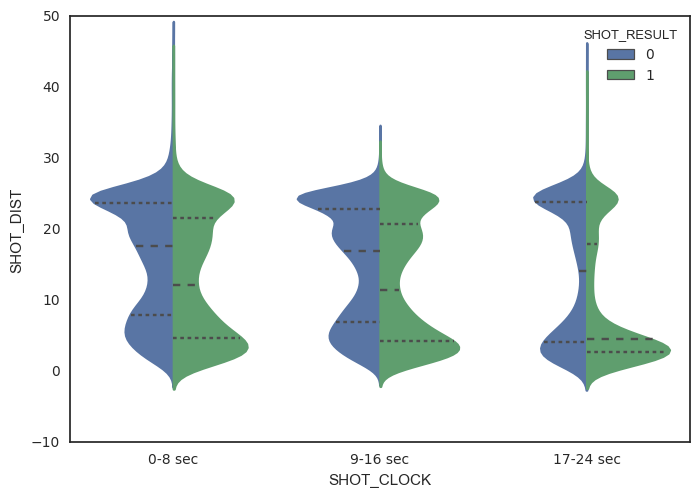

In [46]:
sns.violinplot(x="SHOT_CLOCK", y="SHOT_DIST", hue="SHOT_RESULT", data=df_imputed2, 
               split=True, inner="quart")

## Shot Distribution Heatmaps

We want to view how distances of made shot are distributed around a basketball court. Unfortunately, we are provided a scalar distance away from the basket, and not a radial or vector distance. Therefore, we assigned a random x value to each distance away from the basket. We also examined the distribution of 3 players: Stephen Curry, Lebron James, and DeAndre Jordan.

In [48]:
## http://savvastjortjoglou.com/nba-shot-sharts.html
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

### NBA Shot Distance Heatmap

As indicated by previous graphics, most made shots by NBA players are taken near the basket with a smaller peak around the 3-point line. 

/Users/danh/anaconda/envs/machinelearning/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


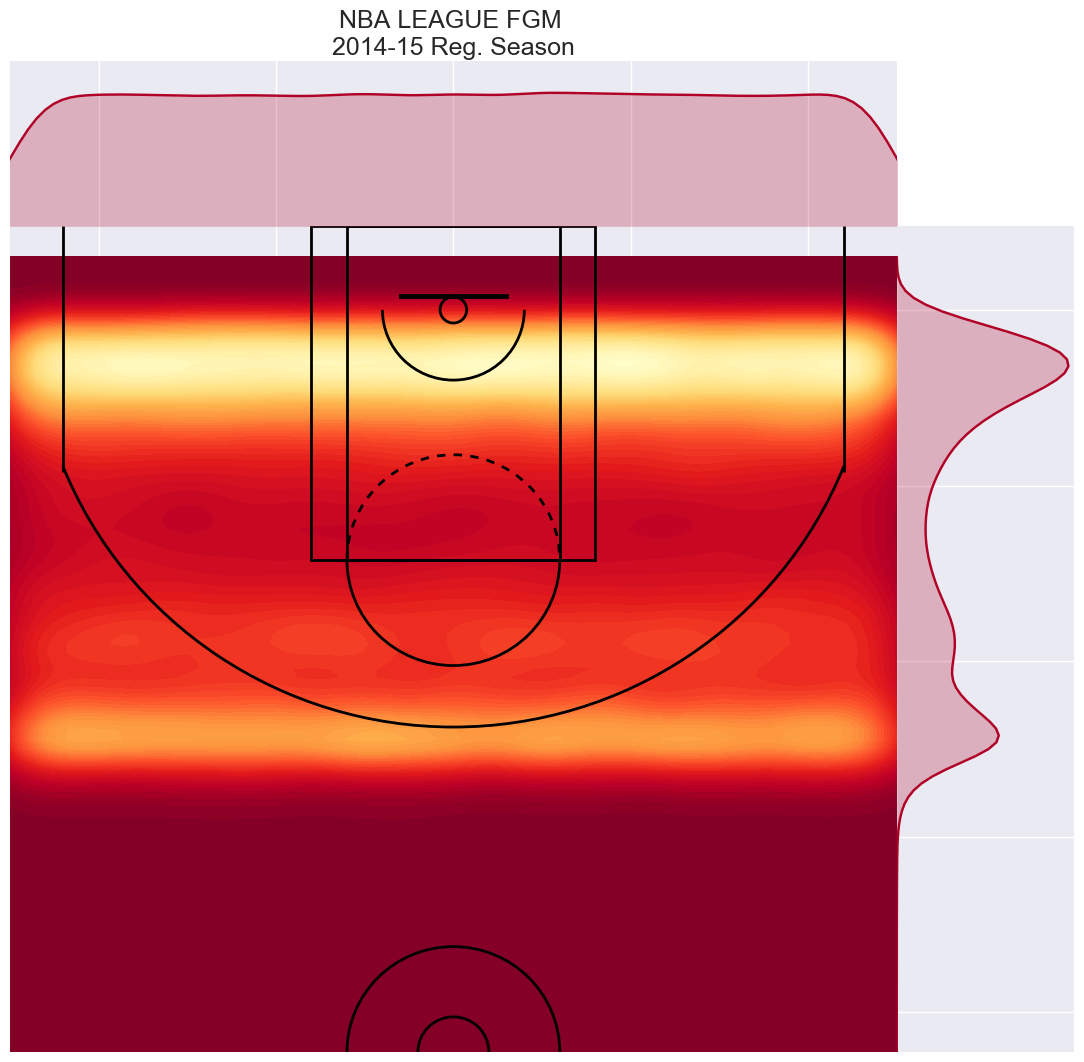

In [65]:
# nba heatmap
import numpy as np
import numpy.random

df_leagueMade = df_imputed2.loc[df_imputed2['SHOT_RESULT'] == 1]
x2 = np.random.random_integers(-250, 250, df_leagueMade.count()[0])
y2 = df_leagueMade.SHOT_DIST * 10
y3 = np.array(y2, dtype=pd.Series)
# create our jointplot

# get our colormap for the main kde plot
# Note we can extract a color from cmap to use for 
# the plots that lie on the side and top axes
cmap=plt.cm.YlOrRd_r 

# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(x2, y3, stat_func=None,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('NBA LEAGUE FGM \n2014-15 Reg. Season', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
plt.show()

In [88]:
# df_imputed2.info()

### Lebron James Made-Shot Heatmap

Lebron James takes less 3-pointers than the NBA average in the 2014-15 regular season, but scores with a wider spread in the paint. With more historical data we could quickly visualize how his playing style changes with these heatmaps.  

In [51]:
df_lebron_james = df_imputed2.loc[df_imputed2['player_name'] == 'lebron james'].copy()

/Users/danh/anaconda/envs/machinelearning/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


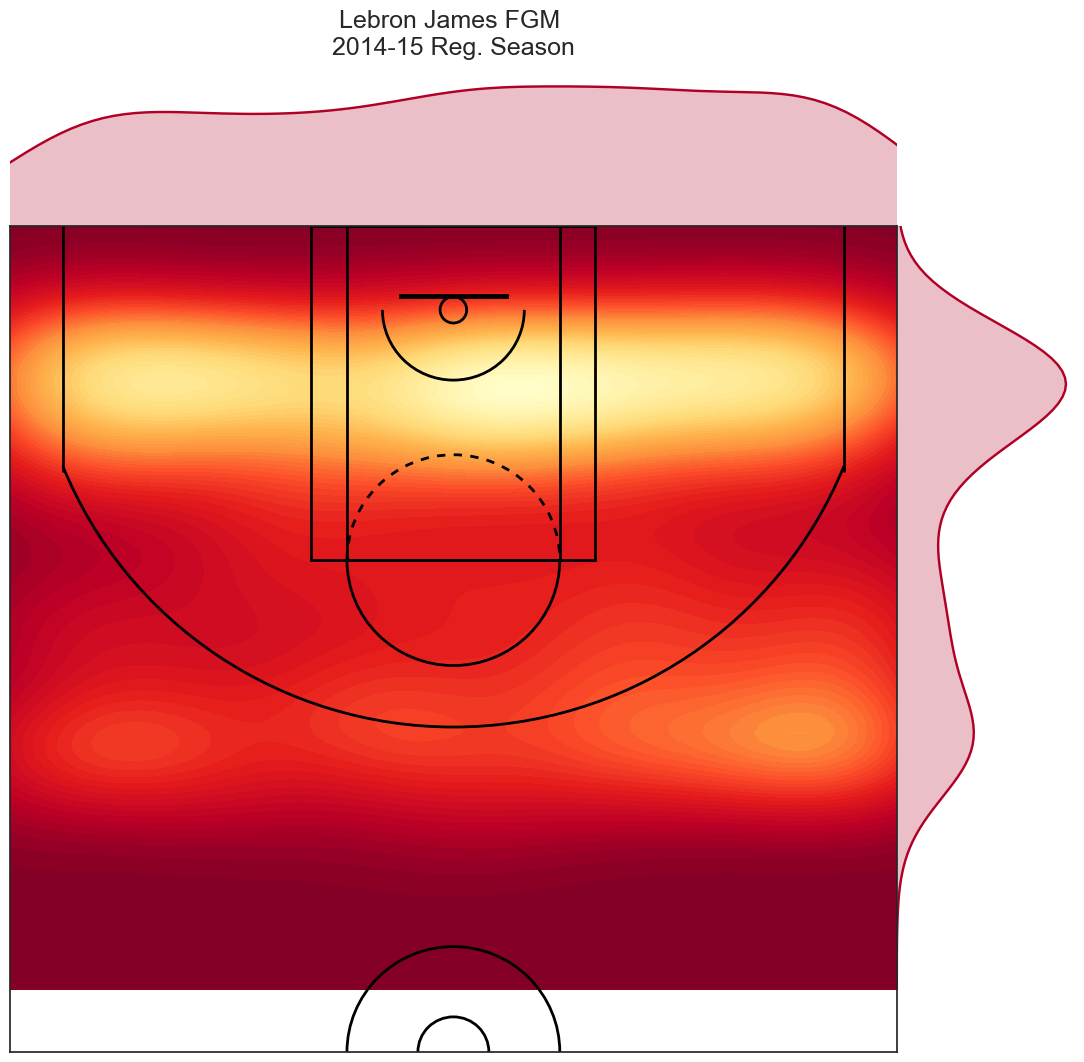

In [57]:
df_lebronMade = df_lebron_james.loc[df_lebron_james['SHOT_RESULT'] == 1]
x = np.random.random_integers(-250, 250, df_lebronMade.count()[0])
y = df_lebronMade.SHOT_DIST * 10
y1 = np.array(y, dtype=pd.Series)
# create our jointplot

# get our colormap for the main kde plot
# Note we can extract a color from cmap to use for 
# the plots that lie on the side and top axes
cmap=plt.cm.YlOrRd_r 

# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(x, y1, stat_func=None,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Lebron James FGM \n2014-15 Reg. Season', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
plt.show()

### Steph Curry Made-Shot Heatmap 

In examining the 2014-15 League MVP shots, it is evident that he does not play like the rest of the league. Most of his shots are not under the basket like Lebron James, and are more concentrated at the 3-point area. 

In [53]:
df_steph_curry = df_imputed2.loc[df_imputed2['player_name'] == 'stephen curry'].copy()

/Users/danh/anaconda/envs/machinelearning/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


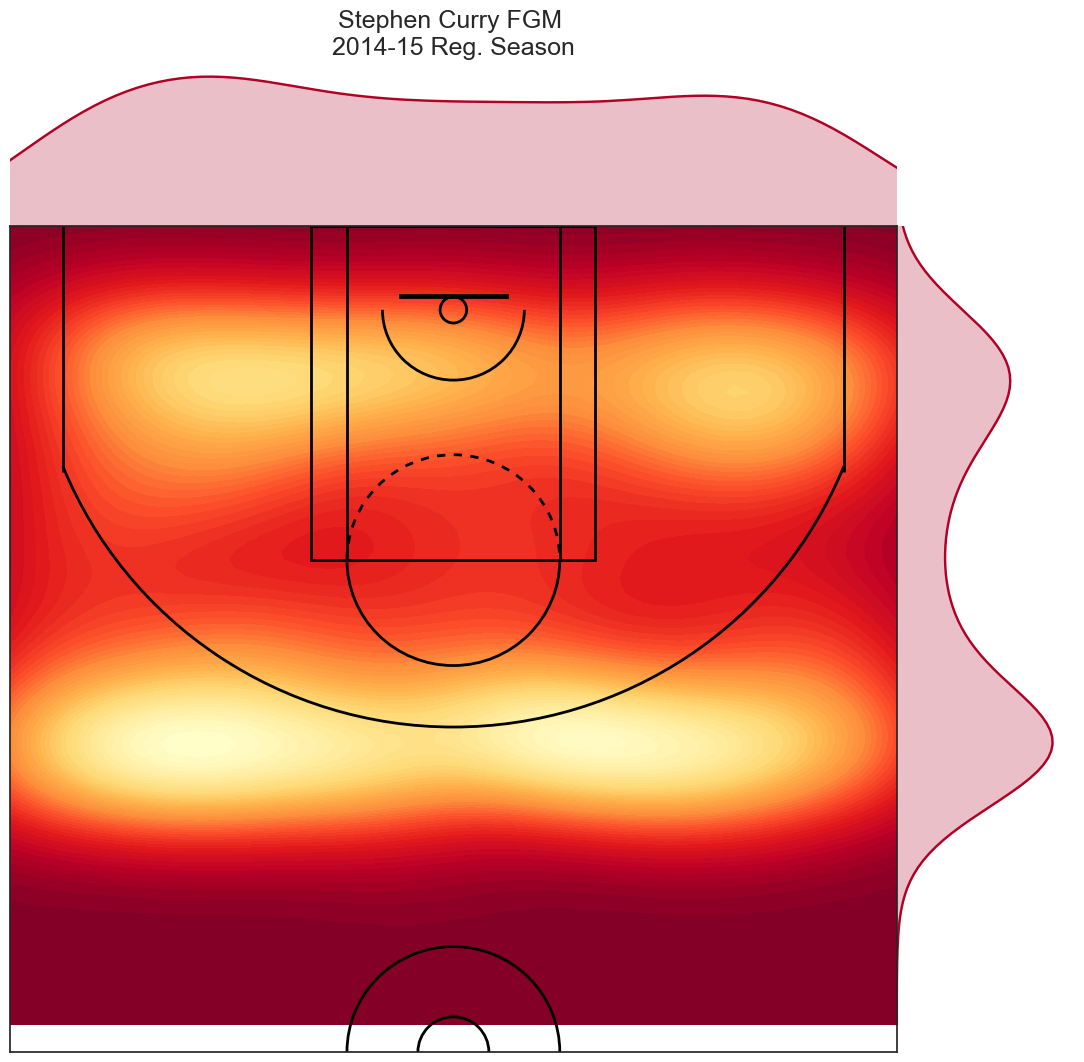

In [54]:
df_steph_curryMade = df_steph_curry.loc[df_steph_curry['SHOT_RESULT'] == 1]
x2 = np.random.random_integers(-250, 250, df_steph_curryMade.count()[0])
y2 = df_steph_curryMade.SHOT_DIST * 10
y3 = np.array(y2, dtype=pd.Series)
# create our jointplot

# get our colormap for the main kde plot
# Note we can extract a color from cmap to use for 
# the plots that lie on the side and top axes
cmap=plt.cm.YlOrRd_r 

# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(x2, y3, stat_func=None,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Stephen Curry FGM \n2014-15 Reg. Season', 
             y=1.2, fontsize=18)

# Add Data Scource and Author


### DeAndre Jordan Made-Shot Heatmap

We examined a player known for being in the other extreme of scoring -- DeAndre Jordan. As shown in the graph, his field goals are very concentrated close to the net, with almost no shots around the free throw and 3-point area. 

In [55]:
df_deandre_jordan = df_imputed2.loc[df_imputed2['player_name'] == 'deandre jordan'].copy()


/Users/danh/anaconda/envs/machinelearning/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


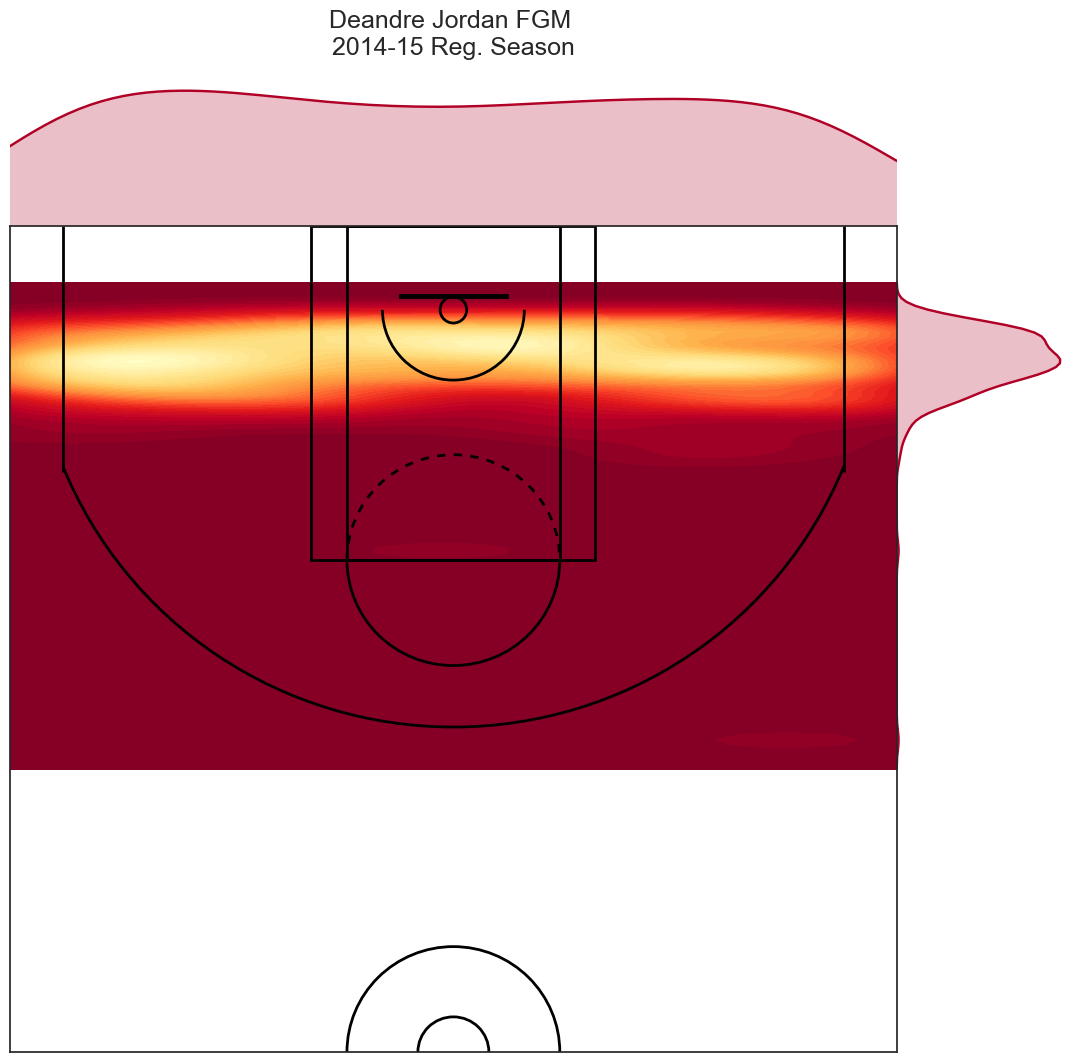

In [58]:
df_DeandreMade = df_deandre_jordan.loc[df_deandre_jordan['SHOT_RESULT'] == 1]
x = np.random.random_integers(-250, 250, df_DeandreMade.count()[0])
y = df_DeandreMade.SHOT_DIST * 10
y1 = np.array(y, dtype=pd.Series)
# create our jointplot

# get our colormap for the main kde plot
# Note we can extract a color from cmap to use for 
# the plots that lie on the side and top axes
cmap=plt.cm.YlOrRd_r 

# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(x, y1, stat_func=None,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Deandre Jordan FGM \n2014-15 Reg. Season', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
plt.show()

### Stephen Curry Shots 

Stephen Curry's missed shots are centered at a farther distance with a wider spread than his made shots. Based on the histogram, we see that similar to the rest of the league, he has more shots in the first and third quarters than the other two quarters. However, he shoots almost as many 3-pointers as he does 2-pointers compared to the rest of the league. 

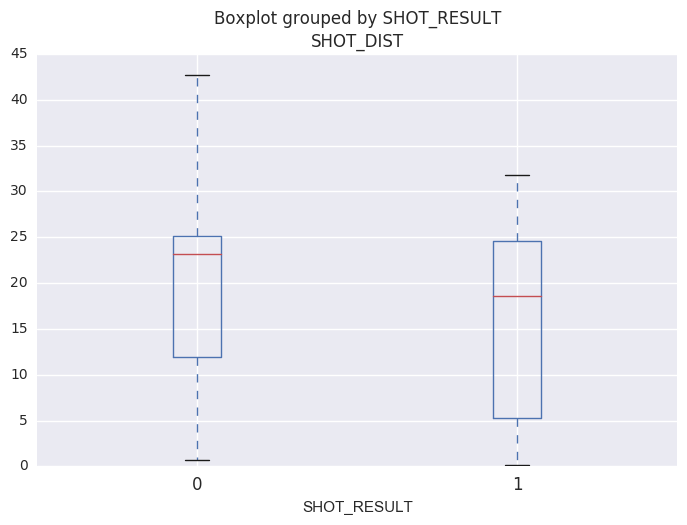

In [60]:
df_steph_curry.boxplot(column='SHOT_DIST', by = 'SHOT_RESULT')

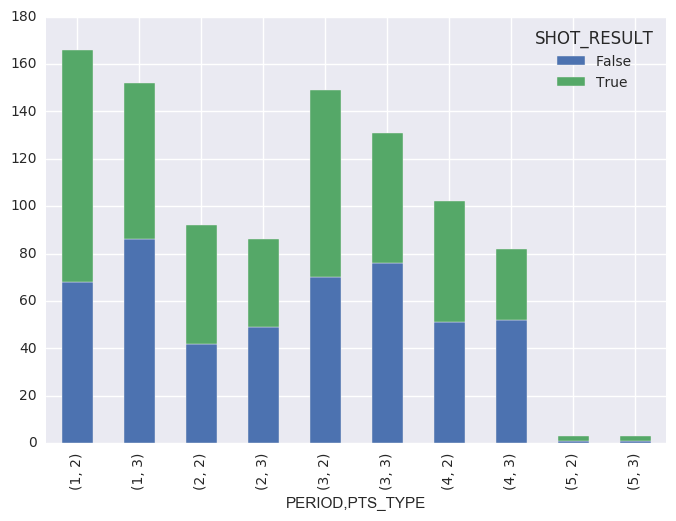

In [61]:
STEPHquarterShots = pd.crosstab([df_steph_curry['PERIOD'], df_steph_curry['PTS_TYPE']], 
                       df_steph_curry.SHOT_RESULT.astype(bool))

STEPHquarterShots.plot(kind='bar', stacked=True)

Stephen Curry's shot distance distribution is centered much more around 3-pointers and winding down the shot clock as compared to the rest of the league. Even though he has a higher miss rate for 3-pointers, he is very evenly distributed in the last few seconds of the shot clock. 

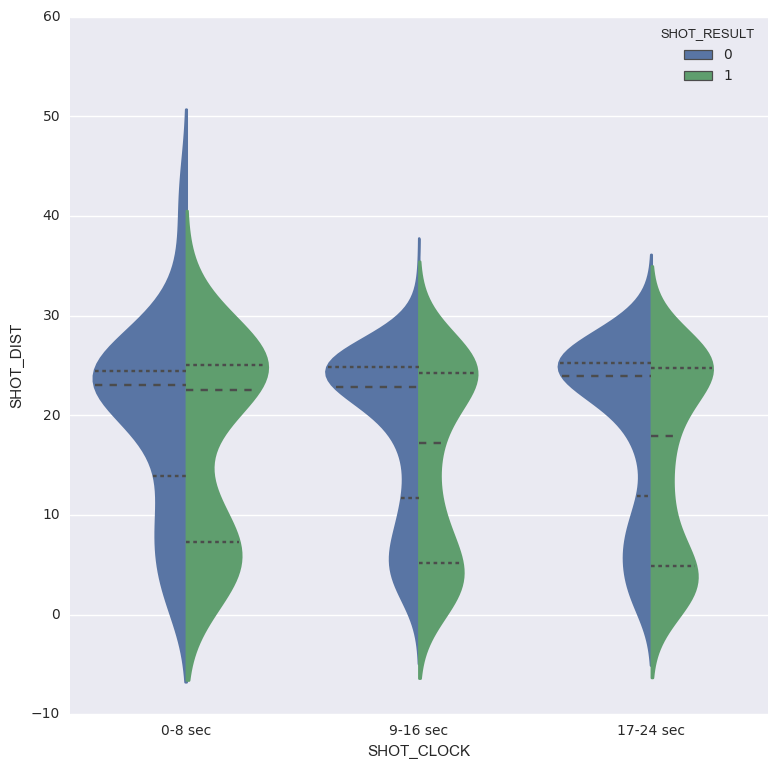

In [64]:
f, ax = plt.subplots(figsize=(9, 9))

sns.violinplot(x="SHOT_CLOCK", y="SHOT_DIST", hue="SHOT_RESULT", data=df_steph_curry, 
               split=True, inner="quart")

### Lebron James Shots

Lebron James's takes less shots in the later quarters and the graphs affirms that he centers his game less on 3-pointers than Curry's.   

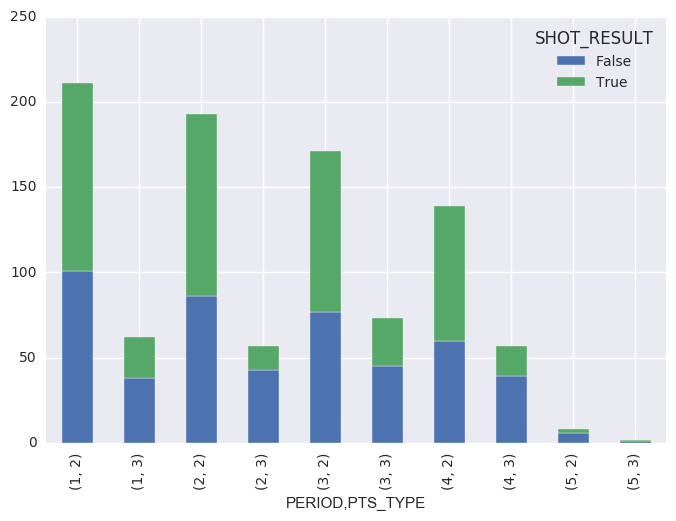

In [62]:
LJquarterShots = pd.crosstab([df_lebron_james['PERIOD'], df_lebron_james['PTS_TYPE']], 
                       df_lebron_james.SHOT_RESULT.astype(bool))

LJquarterShots.plot(kind='bar', stacked=True)

### DeAndre Jordan Shots

DeAndre Jordan game has a very high field goal made percentage, concentrated entirely on 2-pointers, as shown by the graph. 

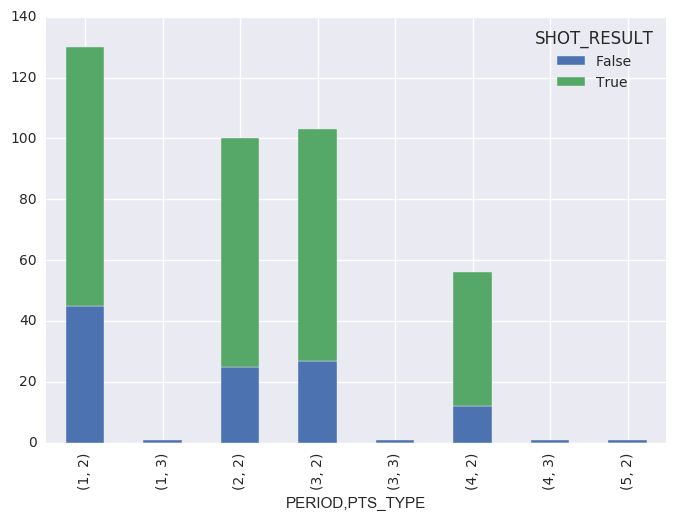

In [63]:
DJquarterShots = pd.crosstab([df_deandre_jordan['PERIOD'], df_deandre_jordan['PTS_TYPE']], 
                       df_deandre_jordan.SHOT_RESULT.astype(bool))

DJquarterShots.plot(kind='bar', stacked=True)